# Building an EONIA Curve

We build an OIS curve from OIS swaps that include forward starting OIS using market data in https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2219548.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

In [3]:
value_dt = Date(11, 12, 2012)

## Building the OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [4]:
depo_dcc_type = DayCountTypes.ACT_360
depos = []

spot_days = 0
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", 0.0400/100.0, depo_dcc_type); depos.append(depo)

spot_days = 1
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", 0.0400/100.0, depo_dcc_type); depos.append(depo)

spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", 0.0400/100.0, depo_dcc_type); depos.append(depo)

###################################### OIS SWAPS START HERE ################################################

swaps = []
swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.ACT_365F
fixed_freq_type = FrequencyTypes.ANNUAL

swap = OIS(settle_dt, "1W", swap_type, 0.0700/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "2W", swap_type, 0.0690/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3W", swap_type, 0.0780/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "1M", swap_type, 0.0740/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

m1Date = Date(16,1,2013)
m2Date = Date(13,2,2013)
m3Date = Date(13,3,2013)
m4Date = Date(10,4,2013)
m5Date = Date(8,5,2013)
m6Date = Date(12,6,2013)

# This OIS stops at the next meeting date
swap = OIS(m1Date, m2Date, swap_type, 0.0460/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(m2Date, m3Date, swap_type, 0.0160/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(m3Date, m4Date, swap_type, -0.007/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(m4Date, m5Date, swap_type, -0.013/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(m5Date, m6Date, swap_type, -0.014/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

# Standard OIS with standard annual terms
swap = OIS(settle_dt, "15M", swap_type, 0.002/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "18M", swap_type, 0.008/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "21M", swap_type, 0.021/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "2Y", swap_type, 0.036/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3Y", swap_type, 0.127/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "4Y", swap_type, 0.274/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "5Y", swap_type, 0.456/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "6Y", swap_type, 0.647/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "7Y", swap_type, 0.827/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "8Y", swap_type, 0.996/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "9Y", swap_type, 1.147/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "10Y", swap_type, 1.280/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "11Y", swap_type, 1.404/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "12Y", swap_type, 1.516/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "15Y", swap_type, 1.764/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "20Y", swap_type, 1.939/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "25Y", swap_type, 2.003/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "30Y", swap_type, 2.038/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

In [5]:
oisCurveFF = OISCurve(value_dt, depos, [], swaps, InterpTypes.FLAT_FWD_RATES)

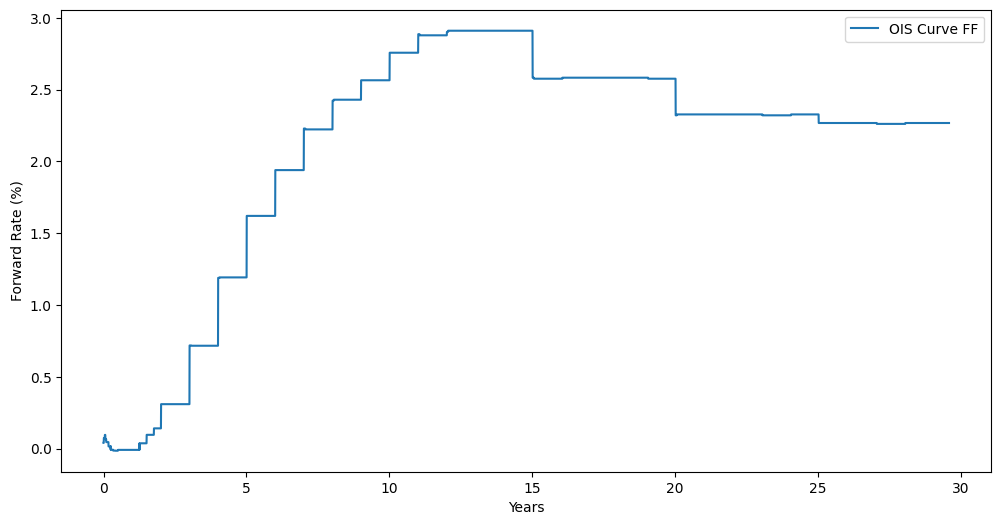

In [6]:
dayMax = 30*360
years = np.linspace(0, dayMax/365, dayMax)
dates = value_dt.add_years(years)
oisCurveFwdsFF = oisCurveFF.fwd(dates)

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="OIS Curve FF")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

## Examining the Short End

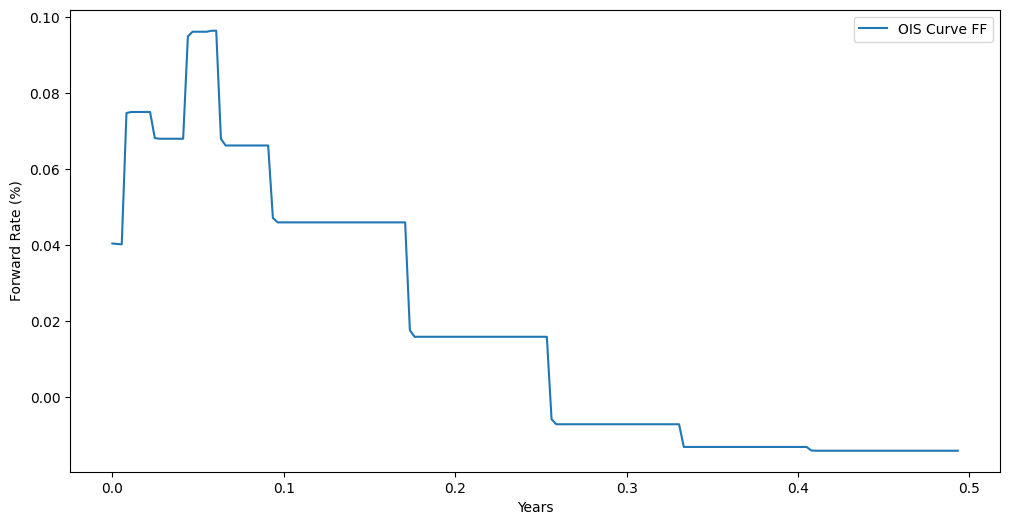

In [7]:
dayMax = 180
years = np.linspace(0, dayMax/365, dayMax)
dates = value_dt.add_years(years)
oisCurveFwdsFF = oisCurveFF.fwd(dates)

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="OIS Curve FF")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

We can examine the detailed structure of the short term rates.

The different interpolation schemes have their own strengths and weaknesses.

Copyright (c) Dominic O'Kane 2020